In [1]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer

In [7]:
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

In [2]:
train_data = pd.read_csv('./train.tsv', sep='\t')

In [4]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
train_data.shape

(156060, 4)

In [8]:
train_data[train_data.SentenceId==1]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


In [10]:
train_data.drop_duplicates(subset=['SentenceId'], keep='first', inplace=True)

In [12]:
train_data.shape

(8529, 4)

<AxesSubplot:>

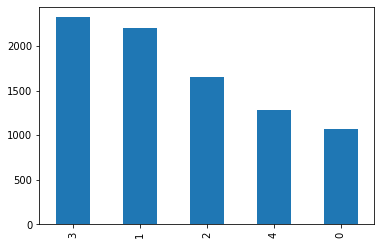

In [18]:
train_data['Sentiment'].value_counts().plot(kind='bar')

In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213k/213k [00:06<00:00, 33.9kB/s]


In [23]:
sentences = train_data['Phrase'].tolist()

In [24]:
sentence_embeddings = tokenizer(sentences, max_length=512, padding='max_length', truncation=True, return_tensors='np', add_special_tokens=True)

In [28]:
sentence_embeddings

{'input_ids': array([[ 101,  138, 1326, ...,    0,    0,    0],
       [ 101, 1188, 3589, ...,    0,    0,    0],
       [ 101, 2431, 3899, ...,    0,    0,    0],
       ...,
       [ 101,  118,  149, ...,    0,    0,    0],
       [ 101, 1109, 2523, ...,    0,    0,    0],
       [ 101, 1109, 1273, ...,    0,    0,    0]]), 'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])}

In [29]:
input_ids = sentence_embeddings['input_ids']
attention_mask = sentence_embeddings['attention_mask']

In [31]:
with open('input_ids_np.npy', 'wb') as f:
    np.save(f, input_ids)
with open('attention_mask_np.npy', 'wb') as f:
    np.save(f, attention_mask)

In [37]:
labels = train_data['Sentiment'].values
labels.shape

(8529,)

In [38]:
labels_one_hot = np.zeros((len(labels), 5))

In [43]:
labels_one_hot[np.arange(len(labels)), labels] = 1

In [44]:
labels

array([1, 4, 1, ..., 1, 1, 2], dtype=int64)

In [47]:
labels_one_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [46]:
with open('labels.npy', 'wb') as f:
    np.save(f, labels_one_hot)